In [9]:
import hdr
from hdr import *
import skimage
from skimage import io
from skimage import data
from skimage.color import rgb2gray
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
#Read txt file for base informations:

##Folder to read txt from
folder_name = "street"
"""Other Folders:
        desktop
        living_room1
        living_room2
        street
        street2
        taipei
        test
"""

##Read Exposures and insert into a numpy array
txt = pd.read_csv(f"HDR inputs/{folder_name}/image_list.txt",sep="\t",header=None)
print(f"TXT File read: {txt}")
print("   ")

##Create a numpy array for the expositions and check size
txt_array = txt[1].to_numpy()
txt_size  = len(txt_array)
explist = txt_array[1:txt_size].astype(float)

##Check number of images
num_images = txt_size - 1


##Create the log exposure array
lnexp = np.log(explist)


##Create a numpy array for the names of the images
txt_names = txt[0].to_numpy()
images_names = txt_names[1:txt_size]


print(f"Number of images ingested: {num_images}")
print("   ")
print(f"Logaritmic of expositions: {lnexp}")
print("   ")
print(f"Images names: {images_names}")

TXT File read:                0             1                2
0     # Filename      exposure  1/shutter_speed
1   DSC_0102.png             1                1
2   DSC_0101.png           0.5                2
3   DSC_0100.png          0.25                4
4   DSC_0099.png         0.125                8
5   DSC_0098.png        0.0625               16
6   DSC_0097.png       0.03125               32
7   DSC_0096.png      0.015625               64
8   DSC_0095.png     0.0078125              128
9   DSC_0094.png    0.00390625              256
10  DSC_0093.png   0.001953125              512
11  DSC_0092.png  0.0009765625            1024 
   
Number of images ingested: 11
   
Logaritmic of expositions: [ 0.         -0.69314718 -1.38629436 -2.07944154 -2.77258872 -3.4657359
 -4.15888308 -4.85203026 -5.54517744 -6.23832463 -6.93147181]
   
Images names: ['DSC_0102.png' 'DSC_0101.png' 'DSC_0100.png' 'DSC_0099.png'
 'DSC_0098.png' 'DSC_0097.png' 'DSC_0096.png' 'DSC_0095.png'
 'DSC_0094.png' 'DSC_0

Image Width:         680
Image Height:        1024
Image Channels:      3
Quantity of images:  0
Quantity of images:  11


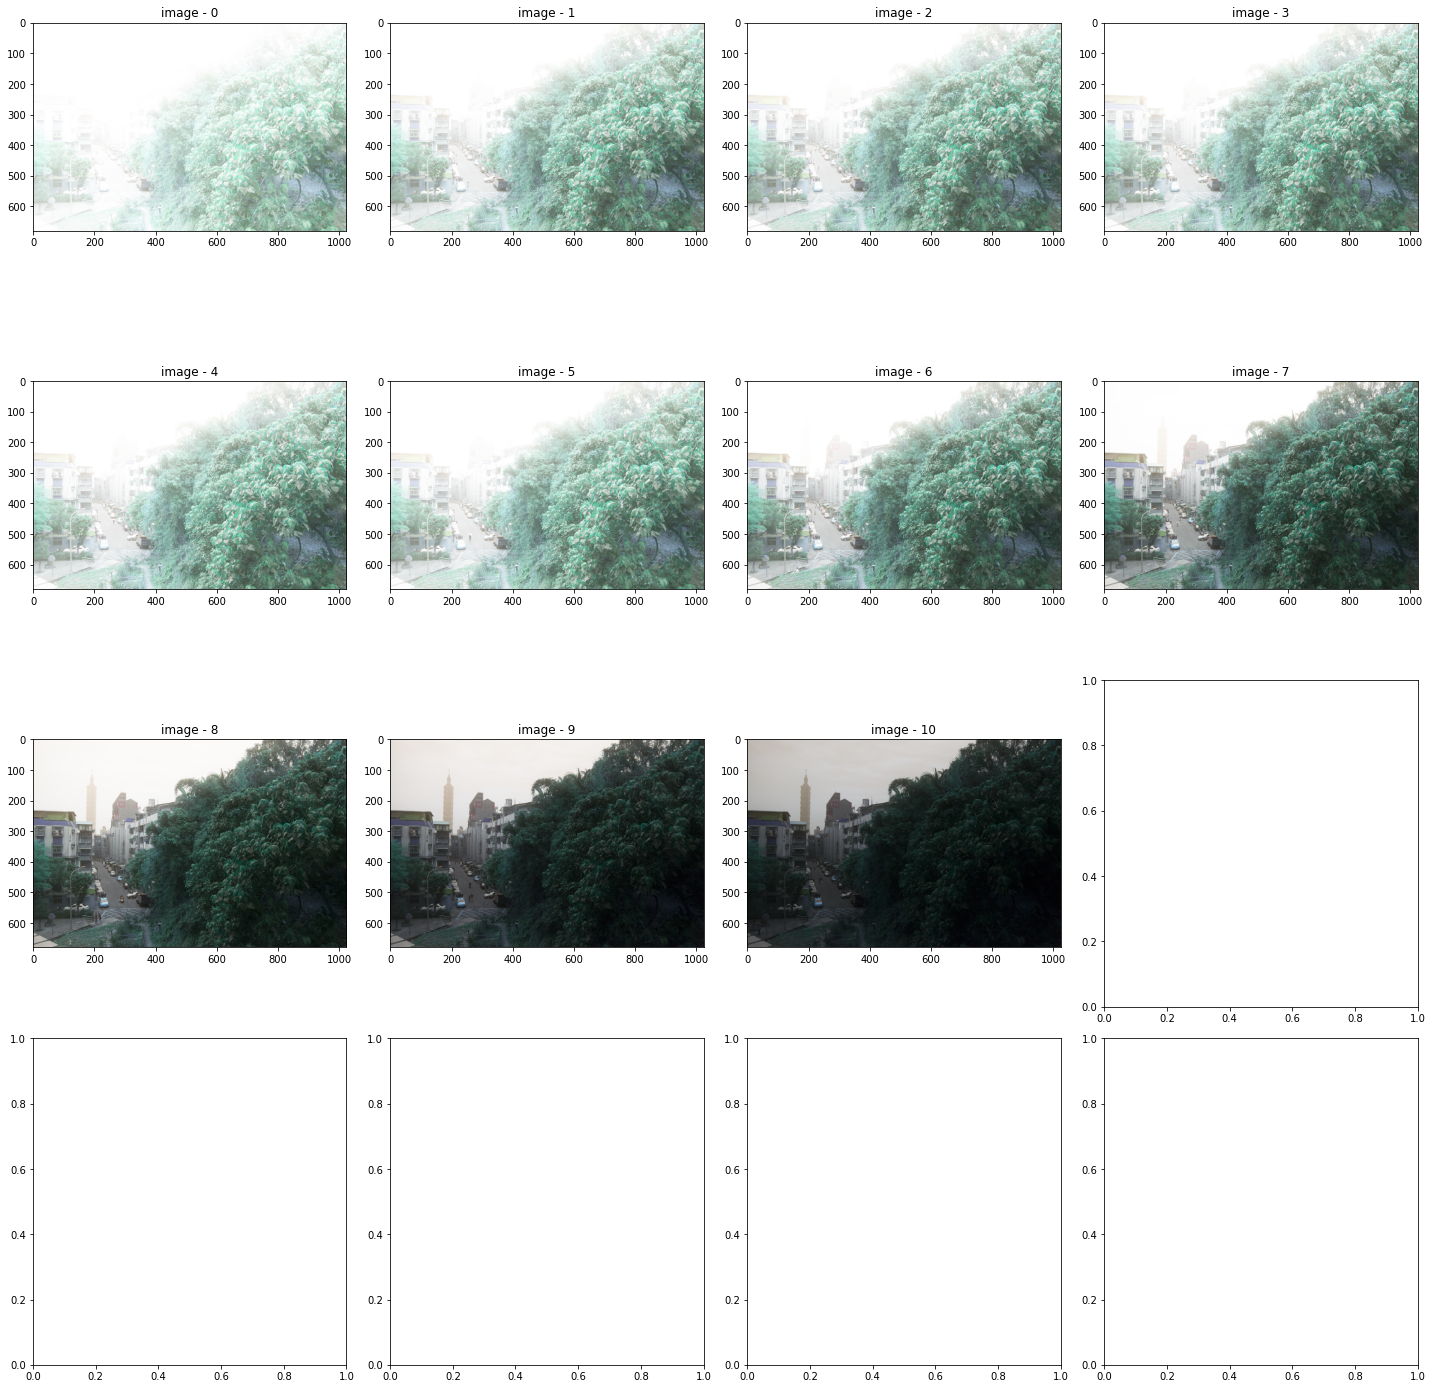

In [18]:
#Ingesting the images for the HDR

## Read one image to verify shape:
baseimg = cv.imread(f"HDR inputs/{folder_name}/{images_names[0]}")

## Test Image Atributes:
img_width    = baseimg.shape[0]
img_height   = baseimg.shape[1]
img_channels = baseimg.shape[2]


print(f"Image Width:         {img_width}")
print(f"Image Height:        {img_height}")
print(f"Image Channels:      {img_channels}")


##Create the list to receive all the images
imagelist = []
print("Quantity of images: ", len(imagelist))


##Ingest all images
for imgname in images_names:
    imagelist.append(cv.imread(f"HDR inputs/{folder_name}/{imgname}"))

print("Quantity of images: ", len(imagelist))


#Ploting Images List
fig, axes = plt.subplots(4,4, figsize=(20, 20))
ax = axes.ravel()
i = 0
while i < len(imagelist):
    ax[i].imshow(imagelist[i])
    ax[i].set_title(f"image - {i}")
    i+=1

fig.tight_layout()
plt.show()

In [19]:
##Doing some tests... 

print(np.shape(imagelist))
a = np.ravel(imagelist)
print(np.shape(a))


n_channels = imagelist[0].shape[2]
for channel in range(n_channels):
    layer_stack = [img[:, :, channel] for img in imagelist]
    print(np.shape(layer_stack))

(11, 680, 1024, 3)
(22978560,)
(11, 680, 1024)
(11, 680, 1024)
(11, 680, 1024)


In [20]:
##Read Exposures and insert into a numpy array
#txt = pd.read_csv("HDR inputs/desktop/image_list.txt",sep="\t",header=None)
#numpy = txt[1].to_numpy()
#a = len(numpy)
#explist = numpy[1:a].astype(float)
#
##Create the log exposure array
#lnexp = np.log(explist)

In [21]:
#Compute HDR

output = computeHDR(imagelist, lnexp, smoothing_lambda=100., gamma=1.0)

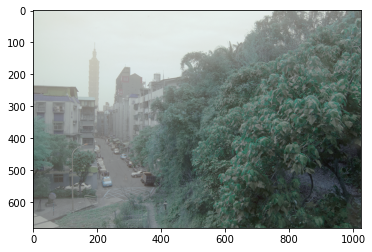

In [22]:
plt.imshow(output)

In [23]:
cv.imwrite(f"HDR inputs/{folder_name}/output_hdr.png",output)

True